In [1]:
from PhD_Photutils_final import *
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import numpy as np
import h5py
import pandas
from tqdm.notebook import tqdm

#We set graph parameters to make sure they are all readable and of good size.
font = {'size'   : 10}
plt.rc('font', **font)
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = [7,5]
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.visible'] = 'True'
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.visible'] = 'True'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['font.family'] = 'Microsoft Sans Serif'
plt.rcParams['mathtext.rm'] = 'Microsoft Sans Serif'
plt.rcParams['mathtext.it'] = 'Microsoft Sans Serif'
plt.rcParams['mathtext.bf'] = 'Microsoft Sans Serif'
plt.rcParams['axes.linewidth'] = 1.0

In [2]:
detect_img = ImageFromDifferentSources(data_file = 'detect_277-356_sci.fits', img_name='JWST_detect_277-356', wht_file = 'detect_277-356_wht.fits')
filter_img = ImageFromDifferentSources(data_file = 'ceers_nircam10_f115w_sci_bkgsub.fits', img_name='JWST_F115W', err_file = 'ceers_nircam10_f115w_err.fits')
img = ImageFromDifferentSources(data_file = 'ceers_nircam10_f277w_sci_bkgsub.fits', img_name='JWST_F277W', err_file = 'ceers_nircam10_f277w_err.fits')

C:\Users\adrie\PhD_Photutils_final.py:524: RuntimeWarning: divide by zero encountered in divide
  self.err = 1 / np.sqrt(self.wht)


In [3]:
from astropy.convolution import Tophat2DKernel

smooth_sigma = 2 / np.sqrt(2)
smooth_kernel = Tophat2DKernel(smooth_sigma, x_size=5, y_size=5)
smooth_kernel.normalize()
data = convolve(detect_img.sci, smooth_kernel)
print(data)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. nan nan ... nan nan  0.]
 [ 0. nan nan ... nan nan  0.]
 ...
 [ 0. nan nan ... nan nan  0.]
 [ 0. nan nan ... nan nan  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


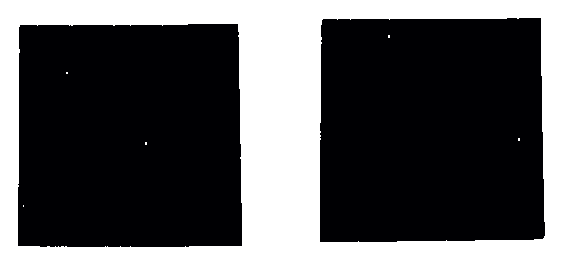

In [4]:
differences = detect_img.sci - data
fig, ax = plt.subplots()

vmin = np.min(differences)
vmax = np.max(differences)
ax.axis('off')
ax.imshow(differences, cmap=cm.magma, vmin=vmin, vmax=vmax, origin='lower')
        
plt.show()

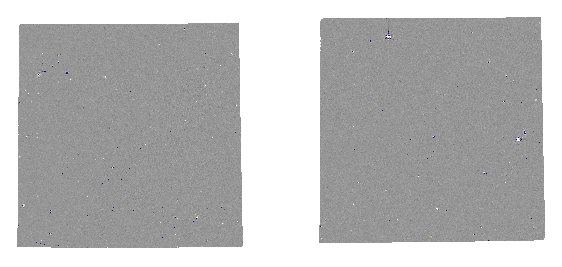

In [5]:
differences = detect_img.sci - data
fig, ax = plt.subplots()

sig = (differences)/detect_img.err

ax.imshow(sig, cmap = cm.Greys, vmin = -2.5*2, vmax = 2.5*2, origin = 'lower', interpolation = 'none')
ax.imshow(np.ma.masked_where(sig <= 2.5, sig), cmap = cm.plasma, vmin = 2.5, vmax = 100, origin = 'lower', interpolation = 'none')
ax.set_axis_off()
        
plt.show()

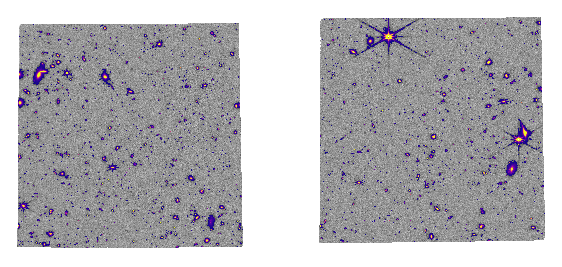

In [6]:
make_significance_panel(detect_img)

In [7]:
print(np.nanmax(detect_img.sci-data))

21.628471902529178


In [8]:
detect_img.sci

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [9]:
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       ...,
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Detection Image processing


C:\Users\adrie\PhD_Photutils_final.py:145: RuntimeWarning: divide by zero encountered in divide
  detection_threshold = nsigma * (1/np.sqrt(self.wht))


Smoothing kernel used : Tophat


Deblending:   0%|          | 0/5775 [00:00<?, ?it/s]

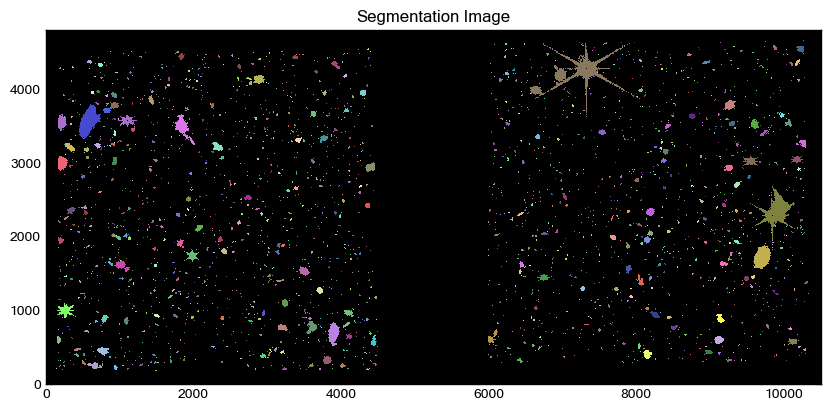

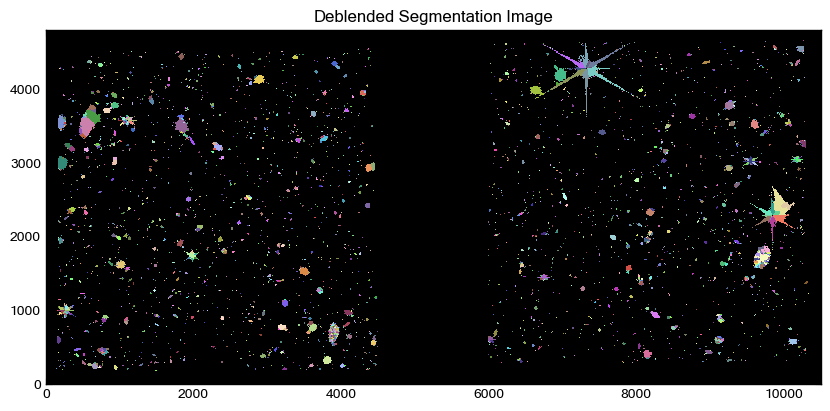

circular_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius prep:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

Filter Image 1 processing


circular_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius prep:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

C:\Users\adrie\PhD_Photutils_final.py:252: RuntimeWarning: invalid value encountered in scalar divide
  clump_val = 10 * (np.sum(source_data[i]-blurred_source_data[i])/np.sum(source_data[i]))


Filter Image 2 processing


circular_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

kron_photometry:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius prep:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

fluxfrac_radius:   0%|          | 0/10012 [00:00<?, ?it/s]

C:\Users\adrie\PhD_Photutils_final.py:252: RuntimeWarning: invalid value encountered in scalar divide
  clump_val = 10 * (np.sum(source_data[i]-blurred_source_data[i])/np.sum(source_data[i]))


In [10]:
process_images(detect_img, [filter_img, img], nsigma=2, npixels=5, add_columns=['label'], Gini=True, concentration=True, clumpiness=True, show_plots=True)

In [11]:
import h5py

# Open the HDF5 file in read-only mode
file_path = 'Photutils.hdf5'
with h5py.File(file_path, 'r') as file:
    # Print the keys at the root level
    print("Root keys:", list(file.keys()))

    # Iterate through groups and datasets
    def print_hdf5_item(name, obj):
        if isinstance(obj, h5py.Group):
            print("Group:", name)
        elif isinstance(obj, h5py.Dataset):
            print("Dataset:", name)
            print("   Shape:", obj.shape)
            print("   Data type:", obj.dtype)

    file.visititems(print_hdf5_item)

Root keys: ['Photo']
Group: Photo
Group: Photo/Detection_Image
Group: Photo/Detection_Image/JWST_detect_277-356
Dataset: Photo/Detection_Image/JWST_detect_277-356/aper_phot_flux
   Shape: (10012,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/aper_phot_fluxerr
   Shape: (10012,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/clumpiness
   Shape: (10011,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/concentration
   Shape: (10012,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/gini
   Shape: (10012,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/kron_phot_flux
   Shape: (10012,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/kron_phot_fluxerr
   Shape: (10012,)
   Data type: float64
Dataset: Photo/Detection_Image/JWST_detect_277-356/label
   Shape: (10012,)
   Data type: int32
Dataset: Photo/Detection_Image/JWST_detect_277-356/x

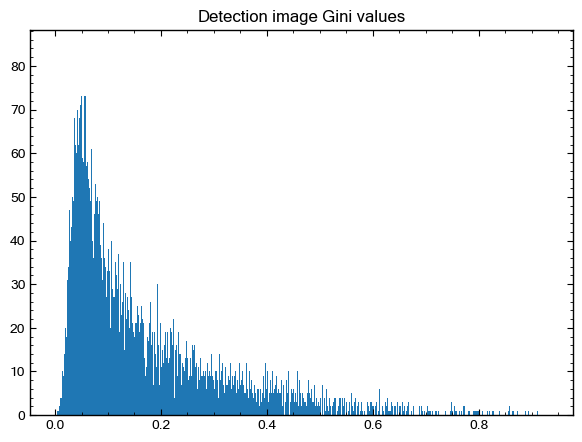

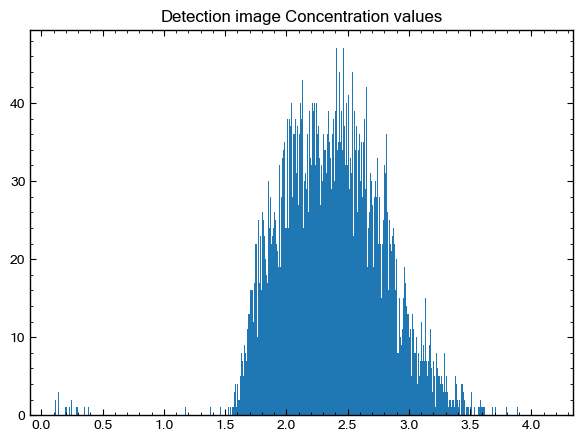

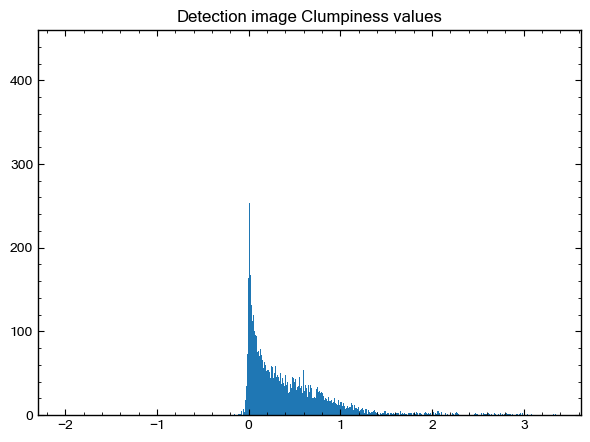

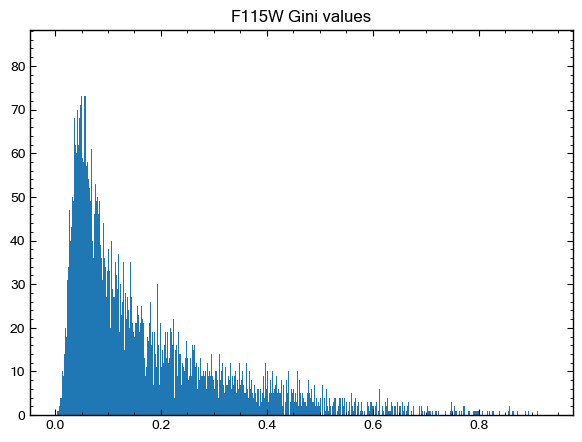

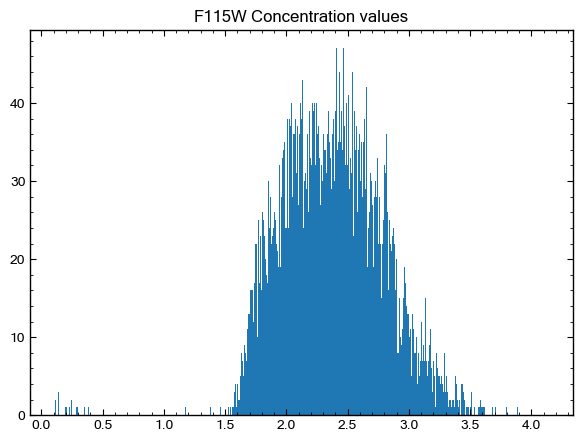

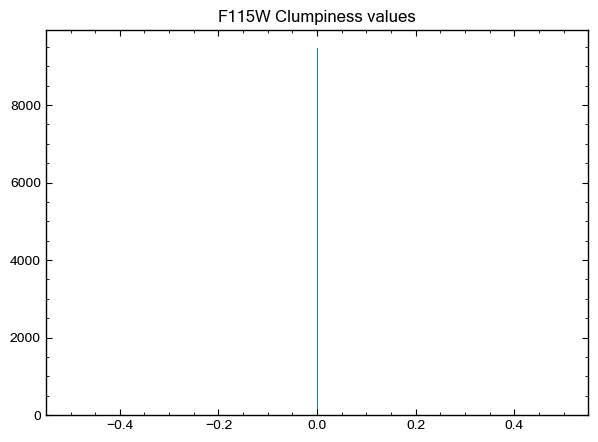

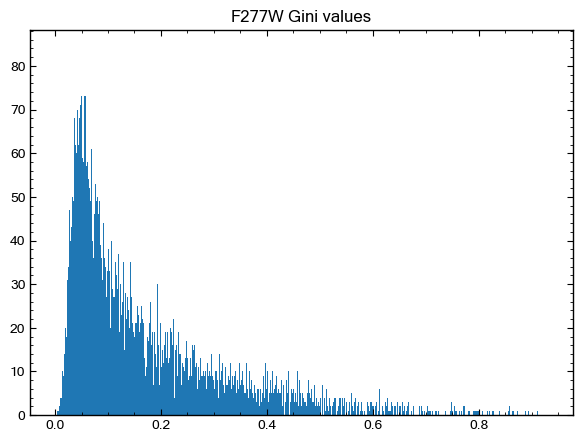

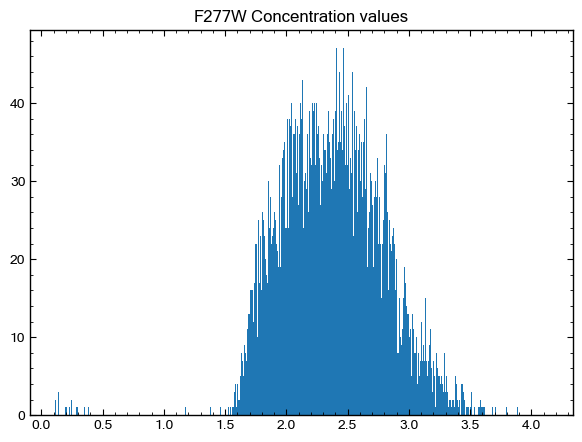

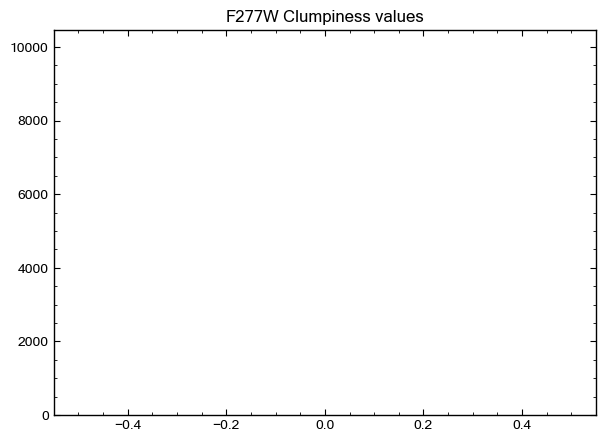

In [22]:
with h5py.File(file_path, 'r') as file:
    # Access the dataset
    gini_detect = file['Photo/Detection_Image/JWST_detect_277-356/gini']
    concentration_detect = file['Photo/Detection_Image/JWST_detect_277-356/concentration']
    clumpiness_detect = file['Photo/Detection_Image/JWST_detect_277-356/clumpiness']
    gini_F115W = file['Photo/Filter_Images/JWST_F115W/gini']
    concentration_F115W = file['Photo/Filter_Images/JWST_F115W/concentration']
    clumpiness_F115W = file['Photo/Filter_Images/JWST_F115W/clumpiness']
    gini_F277W = file['Photo/Filter_Images/JWST_F277W/gini']
    concentration_F277W = file['Photo/Filter_Images/JWST_F277W/concentration']
    clumpiness_F277W = file['Photo/Filter_Images/JWST_F277W/clumpiness']
    
    # Read the values into a NumPy array
    gini_values_detect = np.array(gini_detect)
    concentration_values_detect = np.array(concentration_detect)
    clumpiness_values_detect = np.array(clumpiness_detect)
    gini_values_F115W = np.array(gini_F115W)
    concentration_values_F115W = np.array(concentration_F115W)
    clumpiness_values_F115W = np.array(clumpiness_F115W)
    gini_values_F277W = np.array(gini_F277W)
    concentration_values_F277W = np.array(concentration_F277W)
    clumpiness_values_F277W = np.array(clumpiness_F277W)
        
    # Print or manipulate the values as needed
    plt.hist(gini_values_detect, bins=1000)
    plt.title('Detection image Gini values')
    plt.show()
    plt.hist(concentration_values_detect, bins=1000)
    plt.title('Detection image Concentration values')
    plt.show()
    plt.hist(clumpiness_values_detect, bins=1000)
    plt.title('Detection image Clumpiness values')
    plt.show()
    plt.hist(gini_values_F115W, bins=1000)
    plt.title('F115W Gini values')
    plt.show()
    plt.hist(concentration_values_F115W, bins=1000)
    plt.title('F115W Concentration values')
    plt.show()
    plt.hist(clumpiness_values_F115W, bins=1000)
    plt.title('F115W Clumpiness values')
    plt.show()
    plt.hist(gini_values_F277W, bins=1000)
    plt.title('F277W Gini values')
    plt.show()
    plt.hist(concentration_values_F277W, bins=1000)
    plt.title('F277W Concentration values')
    plt.show()
    plt.hist(clumpiness_values_F277W, bins=1000)
    plt.title('F277W Clumpiness values')
    plt.show()

In [13]:
cutout=make_cutout(detect_img, 3800, 7600, 400, 400)

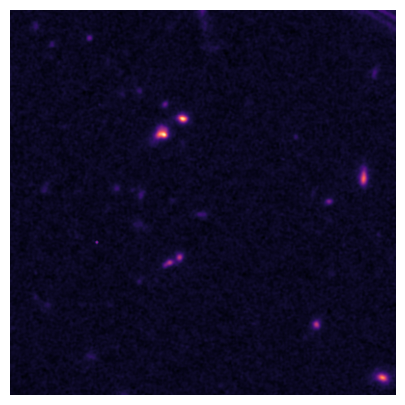

In [14]:
make_img_panel(cutout)

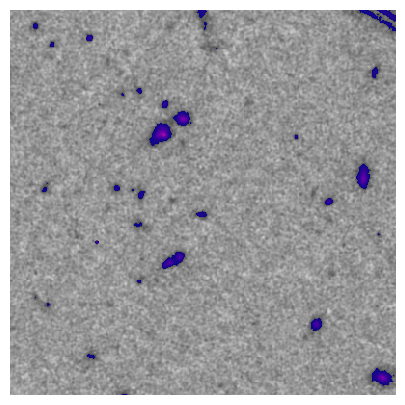

In [15]:
make_significance_panel(cutout)

Smoothing kernel used : Tophat


Deblending:   0%|          | 0/27 [00:00<?, ?it/s]

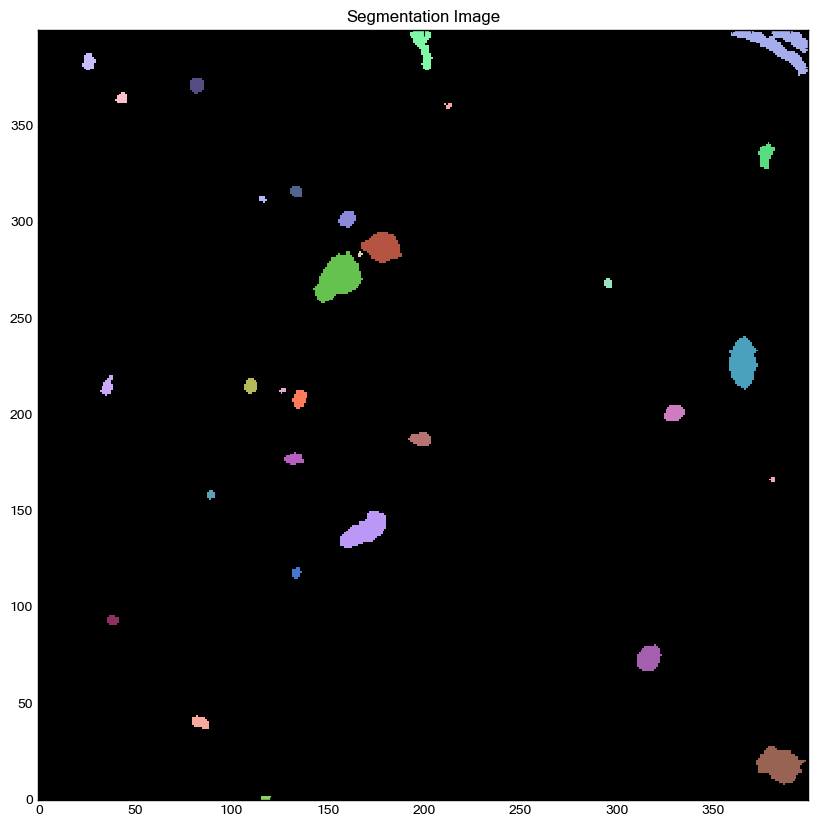

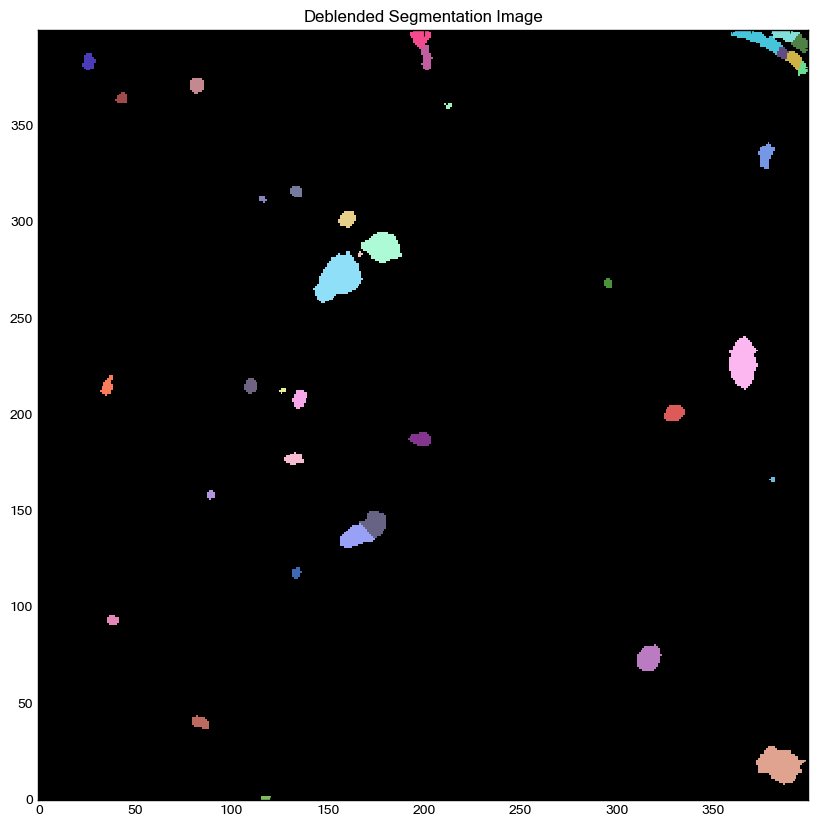

In [16]:
cutout.detect_sources(2,5, contrast=0.001)

In [17]:
#https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-performance/nircam-absolute-flux-calibration-and-zeropoints

In [18]:
#Graham et al. 2001 : https://iopscience.iop.org/article/10.1086/323090/pdf
#Bershady et al. 2000 : https://arxiv.org/pdf/astro-ph/0002262.pdf
#Conselice et al. 2014 : https://arxiv.org/pdf/1403.2783.pdf

In [64]:
cutout=make_cutout(detect_img, 4260, 7320, 400, 400)

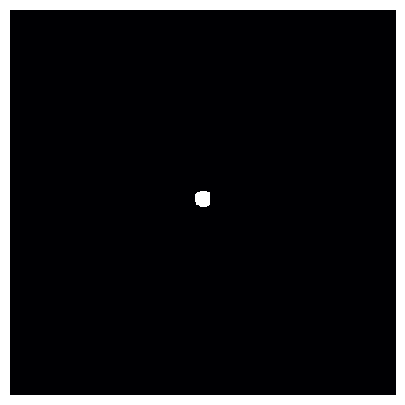

In [65]:
make_img_panel(cutout)

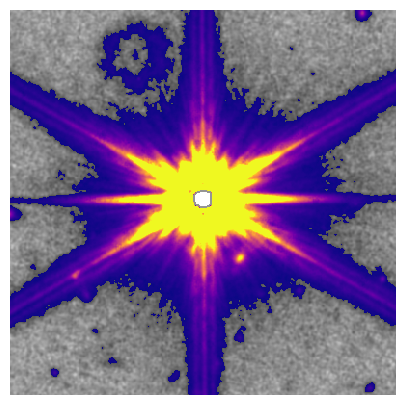

In [66]:
make_significance_panel(cutout)